In [7]:
%pylab inline
import pandas as pd

import seaborn as sns
sns.set_style("whitegrid")

Populating the interactive namespace from numpy and matplotlib


In [8]:
df_train_variant = pd.read_csv("training_variants").set_index("ID")
df_train_text = pd.read_csv("training_text", delimiter = "\|\|", skiprows=1, names=['ID', 'Text'], engine="python").set_index('ID')

df_test_variant = pd.read_csv("test_variants").set_index("ID")
df_test_text = pd.read_csv("test_text", delimiter = "\|\|", skiprows = 1, names=["ID", "Text"], engine="python").set_index("ID")

In [9]:
df_train = pd.concat([df_train_variant, df_train_text ], axis=1)
df_test = pd.concat([df_test_variant, df_test_text], axis=1)

In [10]:
display(df_train.head())
display(df_test.head())

,Gene,Variation,Class,Text
ID,,,,
0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


,Gene,Variation,Text
ID,,,
0,ACSL4,R570S,2. This mutation resulted in a myeloproliferat...
1,NAGLU,P521L,Abstract The Large Tumor Suppressor 1 (LATS1)...
2,PAH,L333F,Vascular endothelial growth factor receptor (V...
3,ING1,A148D,Inflammatory myofibroblastic tumor (IMT) is a ...
4,TMEM216,G77A,Abstract Retinoblastoma is a pediatric retina...


In [11]:
print(df_train["Gene"].value_counts()[:10])
print(df_train["Class"].value_counts())

print(df_test["Gene"].value_counts()[:10])

BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
KIT        99
BRAF       93
ALK        69
ERBB2      69
PDGFRA     60
Name: Gene, dtype: int64
7    953
4    686
1    568
2    452
6    275
5    242
3     89
9     37
8     19
Name: Class, dtype: int64
F8       134
CFTR      57
F9        54
G6PD      46
GBA       39
PAH       38
AR        38
CASR      37
ARSA      30
BRCA1     29
Name: Gene, dtype: int64


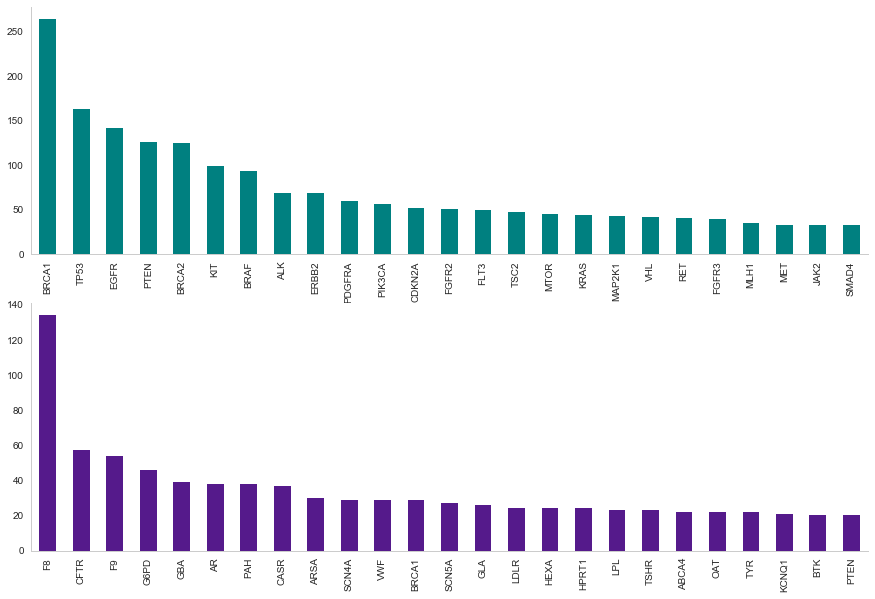

In [12]:
most_common_train = df_train["Gene"].value_counts()[:25] 
most_common_genes = most_common_train.index
df_train_most_common = df_train[df_train["Gene"].isin(most_common_genes)]
df_train_most_common_counts = df_train_most_common["Gene"].value_counts()

most_common_test = df_test["Gene"].value_counts()[:25] 
most_common_genes = most_common_test.index
df_test_most_common = df_test[df_test["Gene"].isin(most_common_genes)]
df_test_most_common_counts = df_test_most_common["Gene"].value_counts()

plt.figure(figsize=(15,10))
ax = plt.subplot(211)
df_train_most_common_counts.plot("bar", color="teal")
plt.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax = plt.subplot(212)
df_test_most_common_counts.plot("bar", color="#551a8b")
plt.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


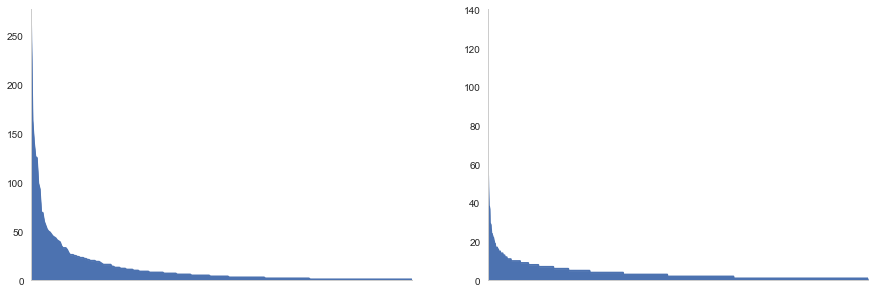

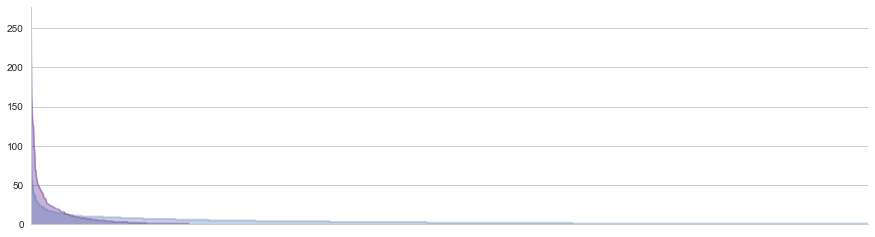

In [13]:
plt.figure(figsize=(15,5))
ax = plt.subplot(121)
df_train["Gene"].value_counts().plot("area")
plt.grid(False)
ax.get_xaxis().set_ticks([])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax = plt.subplot(122)
df_test["Gene"].value_counts().plot("area")
plt.grid(False)
ax.get_xaxis().set_ticks([])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.figure(figsize=(15,4))
ax = plt.subplot()
df_train["Gene"].value_counts().plot("area", alpha=0.33, color="#551a8b")
df_test["Gene"].value_counts().plot("area", alpha=0.33)
ax.get_xaxis().set_ticks([])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

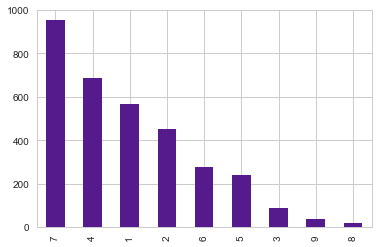

In [14]:
df_train["Class"].value_counts().plot(kind="bar", color = "#551a8b")

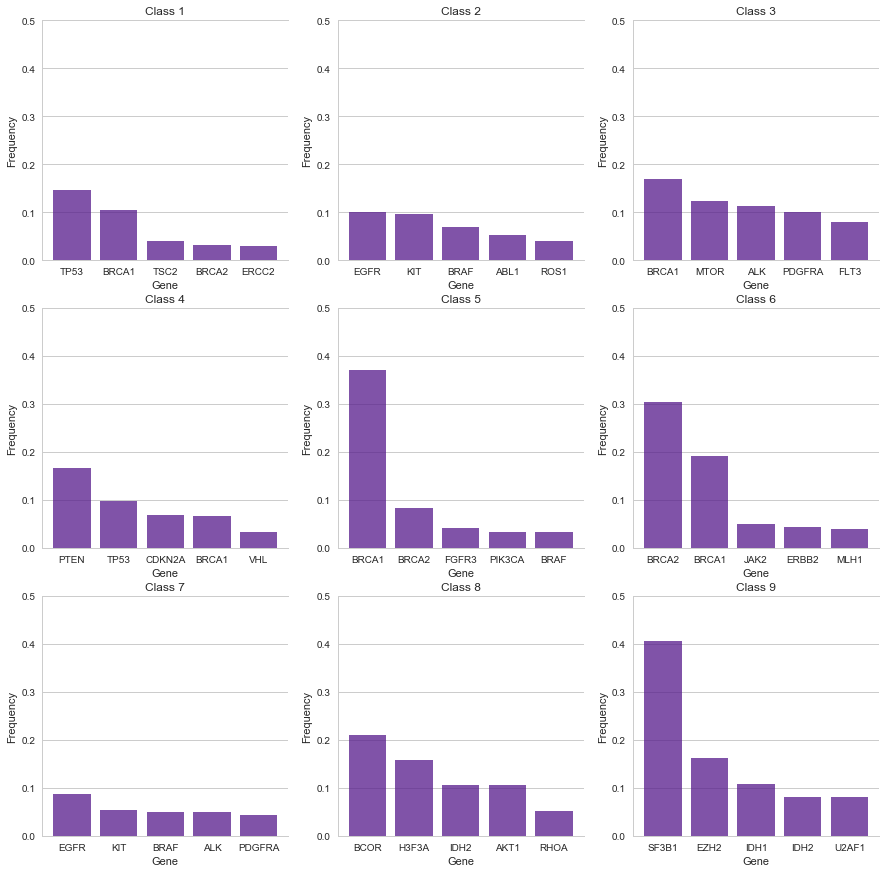

In [15]:
df_train_grouped = df_train.groupby("Class")

plt.figure(figsize = (15,15))
for i,group in enumerate(df_train_grouped):
    most_frequent = group[1]["Gene"].value_counts()[:5]
    total = group[1]["Gene"].value_counts().sum()
    fraction = most_frequent/total
    ax = plt.subplot(3,3,i+1)
    plt.title("Class {}".format(i+1))
    plt.xticks(range(5), group[1]["Gene"].value_counts()[:5].index)
    plt.xlabel("Gene")
    plt.ylabel("Frequency")
    plt.ylim(0, 0.5)
    plt.grid(axis='x')
    ax.spines["right"].set_visible(False)
    fig = plt.bar(range(5), most_frequent/total, color="#551a8b", alpha=0.75)

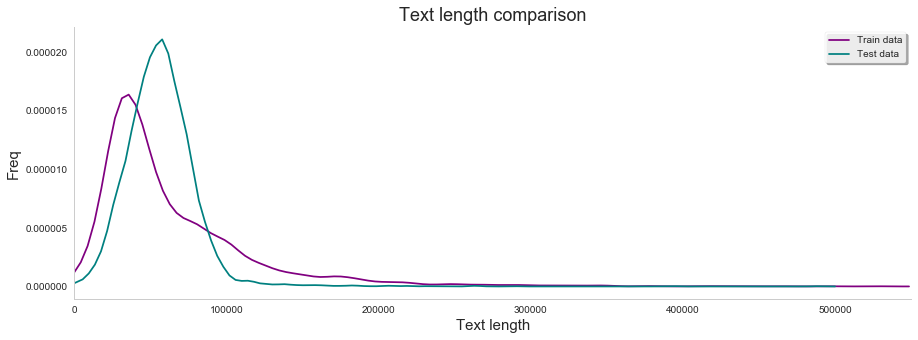

In [47]:
plt.figure(figsize(15,5))
ax = plt.subplot()
train_len = [len(i) for i in df_train["Text"]]
test_len = [len(i) for i in df_test["Text"]]
plt.xlim(0, 550000)
#plt.hist(train_len, color="purple", alpha=0.5, bins=100, label="Train data");
#plt.hist(test_len, color="teal", alpha=0.5, bins=100, label="Test data");
sns.distplot(train_len, hist=False, label="Train data", color="purple");
sns.distplot(test_len, hist=False, label="Test data", color="teal");
plt.legend(frameon=True, fancybox=True, shadow=True);
plt.grid(False);
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
plt.title("Text length comparison", fontsize=18);
plt.xlabel("Text length", fontsize=15);
plt.ylabel("Freq", fontsize=15);

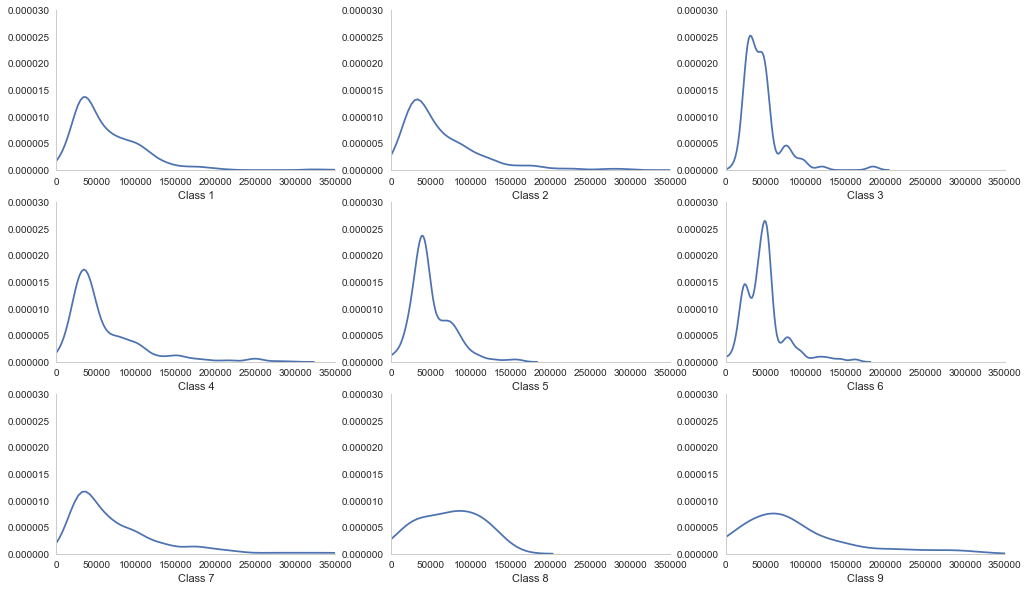

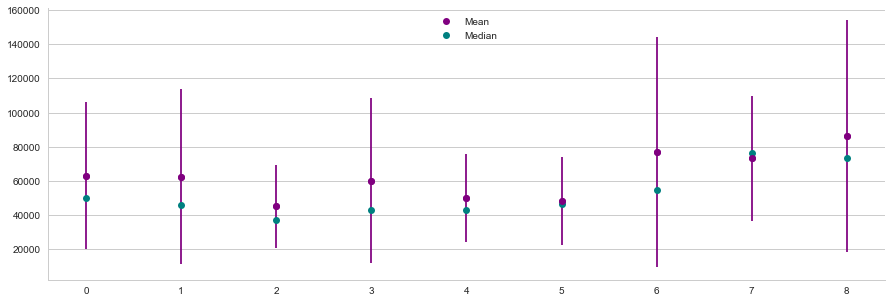

In [129]:
plt.figure(figsize=(17,10))
mean_text_length = []
median_text_length = []
std_text_length = []
for i, group in enumerate(df_train_grouped):
    ax = plt.subplot(3,3,i+1)
    plt.grid(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.xlim(0,350000)
    plt.ylim(0,0.00003)
    length = []
    for text in group[1]["Text"]:
        length.append(len(text))
    mean_text_length.append(np.mean(length))
    median_text_length.append(np.median(length))
    std_text_length.append(np.std(length))
    #plt.hist(length,bins=50,color="purple", alpha=0.66)
    sns.distplot(length, hist=False, axlabel="Class {}".format(i+1))
  
plt.figure()
ax = plt.subplot()
plt.plot(mean_text_length, 'o', color="purple", label="Mean")
ax.errorbar(range(9), mean_text_length, std_text_length, fmt='o', color="purple")
plt.plot(median_text_length,"o", color="teal", label="Median")
plt.legend(loc=9)
plt.grid(axis="x")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

In [180]:
word_filter = ["the", "of", "and", "in", "to", "a", "with", "that", "were", "for", "is", "was", "by", "as", "or", "are", "et", "be", "an", "as", 
               "this", "Fig", "we", "Figure", "these", "we", "our", "these", "this"]
word_count = []

for group in df_train_grouped:
    d = {}
    for text in group[1]["Text"]:
        words = text.split()
        for i in words:
            i = i.strip("(),.-=''[];:").lower()
            if len(i) > 0 and (i[0].isalpha() or i[:-1].isalpha()) and i not in word_filter:
                if i in d:
                    d[i]+=1
                else:
                    d[i] = 1
    word_count.append(sorted(sorted(d.items()), key=lambda x: x[1], reverse=True))

In [224]:
#for j,i in enumerate(word_count):
#    print("Group {}".format(j+1))
#    print(i[:20])
    
words = []
freq = []

for group in word_count:
    word_temp = []
    freq_temp = []
    word_temp = [i[0] for i in group]
    freq_temp = [i[1] for i in group]
    words.append(word_temp)
    freq.append(freq_temp)

percentages = []
for group in freq:
    percentages.append(group/sum(group))

33502
28048
22545
20226
19432
18538
17530
17503
17208
16798


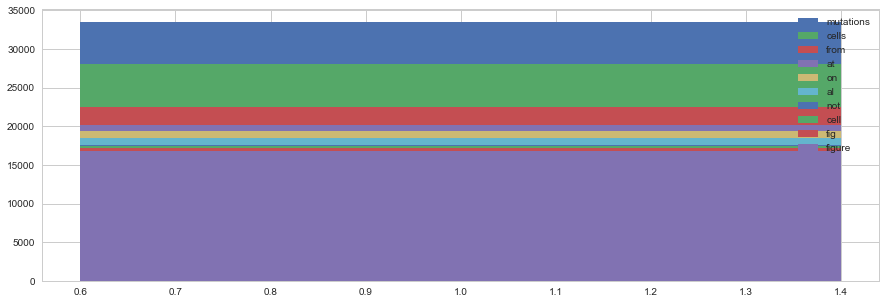

In [202]:
for j,i in enumerate(word_count[0][:10]):
    print(i[1])
    plt.bar(1, i[1], orientation="vertical", label=i[0])
    plt.legend()
    


1


ValueError: incompatible sizes: argument 'width' must be length 9 or scalar

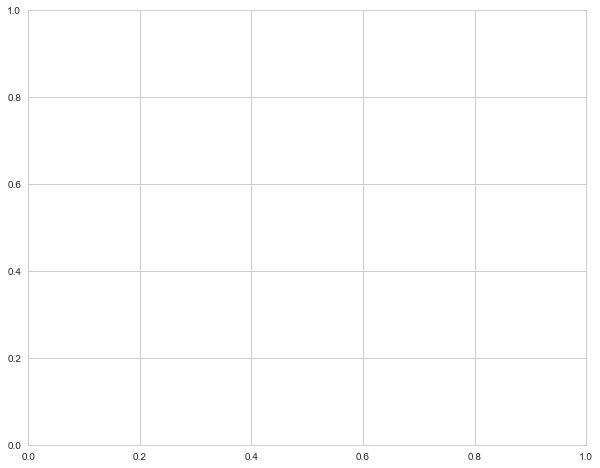

In [232]:
groups = ('1','2','3','4','5','6','7','8', '9')
segments = 10

# generate some multi-dimensional data & arbitrary labels
data = word_count
#percentages = (np.random.randint(5,20, (len(people), segments))) 
y_pos = np.arange(len(groups))

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

colors ='rgbwmc'
patch_handles = []
left = np.zeros(len(groups)) # left alignment of data starts at zero
for i, d in enumerate(groups):
    print(d)
    patch_handles.append(ax.barh(y_pos, d, align='center', 
      left=left))
    # accumulate the left-hand offsets
    left += d

# go through all of the bar segments and annotate
for j in xrange(len(patch_handles)):
    for i, patch in enumerate(patch_handles[j].get_children()):
        bl = patch.get_xy()
        x = 0.5*patch.get_width() + bl[0]
        y = 0.5*patch.get_height() + bl[1]
        ax.text(x,y, "%d%%" % (percentages[i,j]), ha='center')

ax.set_yticks(y_pos)
ax.set_yticklabels(groups)
ax.set_xlabel('Distance')

plt.show()

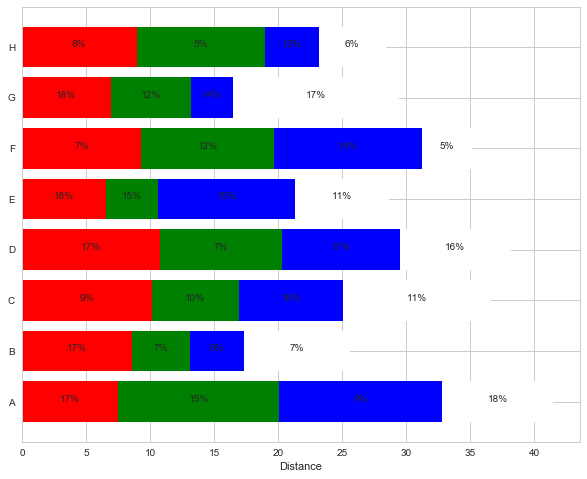

In [234]:
import matplotlib.pyplot as plt

people = ('A','B','C','D','E','F','G','H')
segments = 4

# generate some multi-dimensional data & arbitrary labels
data = 3 + 10* np.random.rand(segments, len(people))
percentages = (np.random.randint(5,20, (len(people), segments)))
y_pos = np.arange(len(people))

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

colors ='rgbwmc'
patch_handles = []
left = np.zeros(len(people)) # left alignment of data starts at zero
for i, d in enumerate(data):
    patch_handles.append(ax.barh(y_pos, d, 
      color=colors[i%len(colors)], align='center', 
      left=left))
    # accumulate the left-hand offsets
    left += d

# go through all of the bar segments and annotate
for j in range(len(patch_handles)):
    for i, patch in enumerate(patch_handles[j].get_children()):
        bl = patch.get_xy()
        x = 0.5*patch.get_width() + bl[0]
        y = 0.5*patch.get_height() + bl[1]
        ax.text(x,y, "%d%%" % (percentages[i,j]), ha='center')

ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.set_xlabel('Distance')

plt.show()

### When looking at split text we can observe some things:
<ol>
    <li>
        <p>There are a lot of numbers, which probably won't tell us much... still we should keep this in mid.</p>
    </li>
    <li>
        <p>A lot of words are surrounded by braces. Those should be removed.</p>
    </li>
    <li>
        <p>A lot of words are filler with no information.</p>
        <ul>
            <li>
                <p>the</p>
            </li>
            <li>
                <p>of</p>
            </li>
            <li>
                <p>and</p>
            </li>
            <li>
                <p>in</p>
            </li>
            <li>
                <p>to</p>
            </li>
            <li>
                <p>a</p>
            </li>
            <li>
                <p>with</p>
            </li>
            <li>
                <p>that</p>
            </li>
            <li>
                <p>were</p>
            </li>
            <li>
                <p>for</p>
            </li>
            <li>
                <p>is</p>
            </li>
            <li>
                <p>was</p>
            </li>
            <li>
                <p>by</p>
            </li>
            <li>
                <p>as</p>
            </li>
            <li>
                <p>or</p>
            </li>
            <li>
                <p>are</p>
            </li>
            <li>
                <p>et</p>
            </li>
            <li>
                <p>be</p>
            </li>
            <li>
                <p>an</p>
            </li>
            <li>
                <p>as</p>
            </li>
        <ul>
    </li>
</ol>